In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import torchvision as tv
import nibabel as nib
import matplotlib.pyplot as plt

from scipy.interpolate import interpn

from deepscm.arch.medical3d import Encoder3D, Decoder3D
from deepscm.datasets.synthetic_medical.synth import NvidiaDataset
from deepscm.datasets.multiple_sclerosis.cis import CISDataset

import seaborn as sns

ModuleNotFoundError: No module named 'h5py'

In [2]:
train = CISDataset(f'../../../data/MS/deepMS/h5files/CIS_rigid_slice_train.h5', type='train', crop_type='center', downsample=0)


In [7]:
(train.brain_vol[train.sex==1].mean() - train.brain_vol[train.sex==0].mean()) 

160.08071820512873

<AxesSubplot:ylabel='Density'>

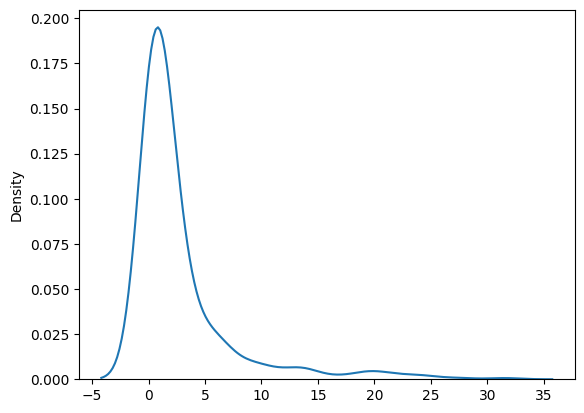

In [27]:
sns.kdeplot(train.lesion_vol)

<AxesSubplot:>

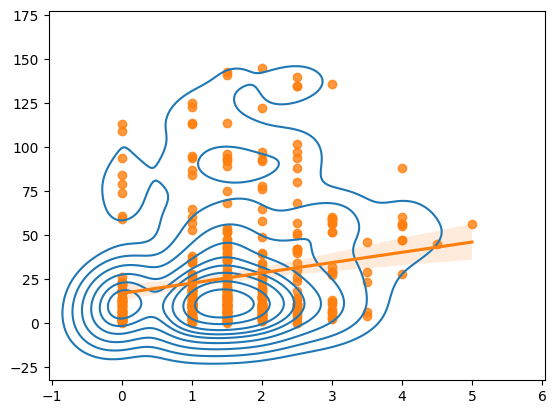

In [16]:
sns.kdeplot(x=train.edss[train.lesion_count < 150], y=train.lesion_count[train.lesion_count < 150])
sns.regplot(x=train.edss[train.lesion_count < 150], y=train.lesion_count[train.lesion_count < 150])

#sns.kdeplot(x=train.age[train.sex==0], y=train.brain_vol[train.sex==0])
#sns.regplot(x=train.edss, y=train.lesion_count)


In [26]:
train.lesion_count[(train.edss < 1) & (train.lesion_count<50)].mean()

10.873015873015873

<AxesSubplot:ylabel='Density'>

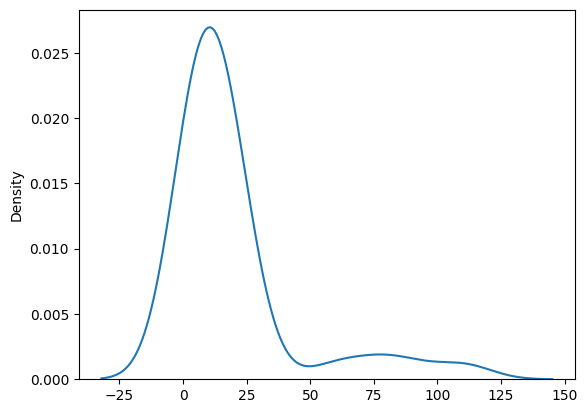

In [23]:
sns.kdeplot(train.lesion_count[train.edss <1])


<AxesSubplot:>

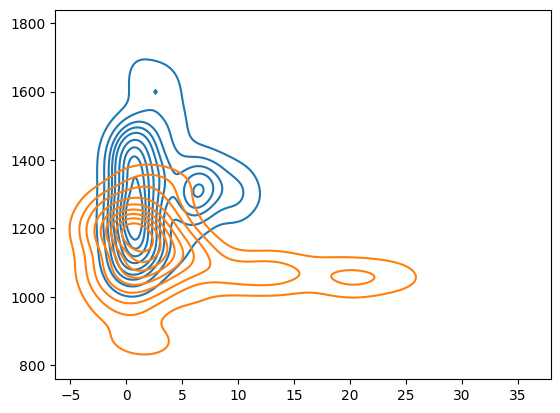

In [26]:
sns.kdeplot(x=train.lesion_vol[train.sex==1], y=train.brain_vol[train.sex==1])
sns.kdeplot(x=train.lesion_vol[train.sex==0], y=train.brain_vol[train.sex==0])

<AxesSubplot:ylabel='Density'>

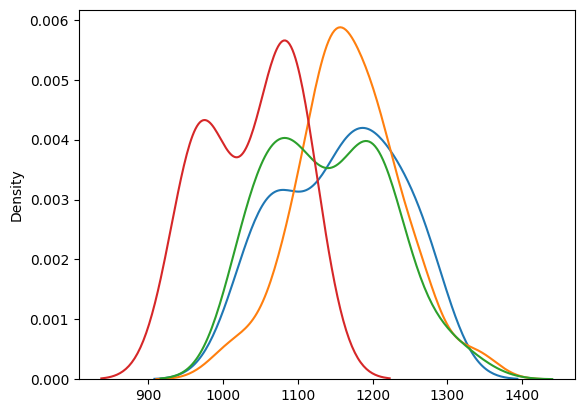

In [21]:
sns.kdeplot(train.brain_vol[(train.edss.round(1) == 0) & (train.sex == 0)])
sns.kdeplot(train.brain_vol[(train.edss.round(1) == 1) & (train.sex == 0)])
sns.kdeplot(train.brain_vol[(train.edss.round(1) == 2) & (train.sex == 0)])
sns.kdeplot(train.brain_vol[(train.edss.round(1) == 3) & (train.sex == 0)])
